In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import time

In [2]:
df_oil = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/oil.csv")
df_holidays = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv")
df_train = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/train.csv",index_col='id')
df_stores = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/stores.csv")
df_transactions = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/transactions.csv")
df_test = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/test.csv",index_col='id')

In [3]:
print('Train: ',min(df_train.date),max(df_train.date))
print('Test: ',min(df_test.date),max(df_test.date))

Train:  2013-01-01 2017-08-15
Test:  2017-08-16 2017-08-31


In [4]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values 
    summ['%missing'] = df.isnull().sum().values / len(df)* 100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values
    
    return summ

In [5]:
df_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [6]:
summary(df_oil)

data shape: (1218, 2)


,data type,#missing,%missing,#unique,min,max,first value,second value,third value
date,object,0,0.000000,1218,NaN,NaN,2013-01-01,2013-01-02,2013-01-03
dcoilwtico,float64,43,3.530378,998,26.19,110.62,NaN,93.14,92.97


In [7]:
# Выводим строки с пропущенными значениями до интерполяции
print("Before interpolation:")
print(df_oil[df_oil['dcoilwtico'].isna()])

# Интерполируем пропущенные значения
df_oil['dcoilwtico'] = df_oil['dcoilwtico'].interpolate()
# Этот код использует метод interpolate для заполнения пропущенных числовых значений
# между ближайшими не-NA значениями с использованием линейной интерполяции.

# Выводим строки с пропущенными значениями после интерполяции
print("\nAfter interpolation:")
print(df_oil[df_oil['dcoilwtico'].isna()])

Before interpolation:
            date  dcoilwtico
0     2013-01-01         NaN
14    2013-01-21         NaN
34    2013-02-18         NaN
63    2013-03-29         NaN
104   2013-05-27         NaN
132   2013-07-04         NaN
174   2013-09-02         NaN
237   2013-11-28         NaN
256   2013-12-25         NaN
261   2014-01-01         NaN
274   2014-01-20         NaN
294   2014-02-17         NaN
338   2014-04-18         NaN
364   2014-05-26         NaN
393   2014-07-04         NaN
434   2014-09-01         NaN
497   2014-11-27         NaN
517   2014-12-25         NaN
522   2015-01-01         NaN
534   2015-01-19         NaN
554   2015-02-16         NaN
588   2015-04-03         NaN
624   2015-05-25         NaN
653   2015-07-03         NaN
699   2015-09-07         NaN
757   2015-11-26         NaN
778   2015-12-25         NaN
783   2016-01-01         NaN
794   2016-01-18         NaN
814   2016-02-15         NaN
843   2016-03-25         NaN
889   2016-05-30         NaN
914   2016-07-04     

In [8]:
df_oil['date'] = pd.to_datetime(df_oil['date'])

In [9]:
df_oil.loc[df_oil['dcoilwtico'].isna(), 'dcoilwtico'] = 93.14

In [10]:
summary(df_oil)

data shape: (1218, 2)


,data type,#missing,%missing,#unique,min,max,first value,second value,third value
date,datetime64[ns],0,0.0,1218,2013-01-01 00:00:00,2017-08-31 00:00:00,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00
dcoilwtico,float64,0,0.0,1036,26.19,110.62,93.14,93.14,92.97


In [11]:
df_stores.head(2)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13


In [12]:
summary(df_stores)

data shape: (54, 5)


,data type,#missing,%missing,#unique,min,max,first value,second value,third value
store_nbr,int64,0,0.0,54,1.0,54.0,1,2,3
city,object,0,0.0,22,NaN,NaN,Quito,Quito,Quito
state,object,0,0.0,16,NaN,NaN,Pichincha,Pichincha,Pichincha
type,object,0,0.0,5,NaN,NaN,D,D,D
cluster,int64,0,0.0,17,1.0,17.0,13,13,8


In [13]:
df_train.head(2)

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0


In [14]:
summary(df_train)

data shape: (3000888, 5)


,data type,#missing,%missing,#unique,min,max,first value,second value,third value
date,object,0,0.0,1684,NaN,NaN,2013-01-01,2013-01-01,2013-01-01
store_nbr,int64,0,0.0,54,1.0,54.0,1,1,1
family,object,0,0.0,33,NaN,NaN,AUTOMOTIVE,BABY CARE,BEAUTY
sales,float64,0,0.0,379610,0.0,124717.0,0.0,0.0,0.0
onpromotion,int64,0,0.0,362,0.0,741.0,0,0,0


In [15]:
df_train['date'] = pd.to_datetime(df_train['date'])

In [16]:
df_test['date'] = pd.to_datetime(df_test['date'])

In [17]:
df_train_start = df_train.date.min().date()
df_train_end = df_train.date.max().date()

missing_dates = pd.date_range(df_train_start, df_train_end
                             ).difference(df_train.date.unique())
missing_dates = missing_dates.strftime("%Y-%m-%d").tolist()

missing_dates

['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25']

In [18]:
df_test_start = df_test.date.min().date()
df_test_end = df_test.date.max().date()

missing_dates_test = pd.date_range(df_test_start, df_test_end
                             ).difference(df_test.date.unique())
missing_dates_test = missing_dates_test.strftime("%Y-%m-%d").tolist()

missing_dates_test

[]

In [19]:
# reindex training data
multi_idx = pd.MultiIndex.from_product([pd.date_range(df_train_start, df_train_end), 
                                        df_train.store_nbr.unique(), 
                                        df_train.family.unique()],
                                        names=["date", "store_nbr", "family"],)
df_train = df_train.set_index(["date", "store_nbr", "family"]
                                 ).reindex(multi_idx).reset_index()
# fill missing values with 0s
df_train[["sales", "onpromotion"]] = df_train[["sales", "onpromotion"]].fillna(0.)

In [20]:
df_transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [21]:
df_transactions['date'] = pd.to_datetime(df_transactions['date'])

In [22]:
summary(df_transactions)

data shape: (83488, 3)


,data type,#missing,%missing,#unique,min,max,first value,second value,third value
date,datetime64[ns],0,0.0,1682,2013-01-01 00:00:00,2017-08-15 00:00:00,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00
store_nbr,int64,0,0.0,54,1.0,54.0,25,1,2
transactions,int64,0,0.0,4993,5.0,8359.0,770,2111,2358


In [23]:
num_store = df_train.store_nbr.nunique()
train_len = (df_train_end - df_train_start).days + 1

num_zero_sales = (df_train.groupby(["date", "store_nbr"]).sales.sum().eq(0)).sum()
total_rec = num_store * train_len
curr_rec = len(df_transactions.index)
missing_rec = total_rec - curr_rec - num_zero_sales

#total sales for each store
store_sales = df_train.groupby(["date", "store_nbr"]).sales.sum().reset_index()

# reindex transaction data
df_transactions = df_transactions.merge(
    store_sales, on=["date", "store_nbr"],how="outer").sort_values(
    ["date", "store_nbr"],ignore_index=True)

# fill missing values with 0s for days with zero sales
df_transactions.loc[df_transactions.sales.eq(0), "transactions"] = 0
df_transactions = df_transactions.drop(columns=["sales"])

# fill remaining missing values using linear interpolation
df_transactions.transactions = df_transactions.groupby(
    "store_nbr", group_keys=False).transactions.apply(
    lambda x: x.interpolate(method="linear", limit_direction="both"))

In [24]:
df_holidays.head(2)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False


In [25]:
df_holidays['date'] = pd.to_datetime(df_holidays['date'])

In [26]:
print('Holidays: ',min(df_holidays.date),max(df_holidays.date))

Holidays:  2012-03-02 00:00:00 2017-12-26 00:00:00


In [27]:
df_holidays['type'].unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [28]:
df_holidays['description'].unique()

array(['Fundacion de Manta', 'Provincializacion de Cotopaxi',
       'Fundacion de Cuenca', 'Cantonizacion de Libertad',
       'Cantonizacion de Riobamba', 'Cantonizacion del Puyo',
       'Cantonizacion de Guaranda', 'Provincializacion de Imbabura',
       'Cantonizacion de Latacunga', 'Fundacion de Machala',
       'Fundacion de Santo Domingo', 'Cantonizacion de El Carmen',
       'Cantonizacion de Cayambe', 'Fundacion de Esmeraldas',
       'Primer Grito de Independencia', 'Fundacion de Riobamba',
       'Fundacion de Ambato', 'Fundacion de Ibarra',
       'Cantonizacion de Quevedo', 'Independencia de Guayaquil',
       'Traslado Independencia de Guayaquil', 'Dia de Difuntos',
       'Independencia de Cuenca', 'Provincializacion de Santo Domingo',
       'Provincializacion Santa Elena', 'Independencia de Guaranda',
       'Independencia de Latacunga', 'Independencia de Ambato',
       'Fundacion de Quito-1', 'Fundacion de Quito', 'Fundacion de Loja',
       'Navidad-4', 'Cantonizac

In [29]:
df_oil = df_oil.merge(pd.DataFrame({"date": pd.date_range(df_train_start, 
                                                              df_test_end)}),
                          on="date",how="outer",).sort_values("date", ignore_index=True)

In [30]:
summary(df_oil)

data shape: (1704, 2)


,data type,#missing,%missing,#unique,min,max,first value,second value,third value
date,datetime64[ns],0,0.000000,1704,2013-01-01 00:00:00,2017-08-31 00:00:00,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00
dcoilwtico,float64,486,28.521127,1036,26.19,110.62,93.14,93.14,92.97


In [31]:
df_oil.dcoilwtico = df_oil.dcoilwtico.interpolate(method="linear", limit_direction="both")

In [32]:
def process_holiday(s):
    if "futbol" in s:
        return "futbol"
    to_remove = list(set(df_stores['city'].str.lower()) | set(df_stores['state'].str.lower()))
    for w in to_remove:
        s = s.replace(w, "")
    return s

df_holidays['description'] = df_holidays.apply(
    lambda x: x['description'].lower().replace(x['locale_name'].lower(), ""), 
    axis=1,).apply(process_holiday).replace(
    r"[+-]\d+|\b(de|del|traslado|recupero|puente|-)\b", "", regex=True,).replace(
    r"\s+|-", " ", regex=True,).str.strip()

# remove transferred holidays
df_holidays = df_holidays[df_holidays['transferred'].eq(False)]

#Saturdays designated as work days 
work_days = df_holidays[df_holidays['type'].eq("Work Day")]
work_days = work_days[["date", "type"]].rename(columns={"type": "work_day"}
                                              ).reset_index(drop=True)
work_days['work_day'] = work_days['work_day'].notna().astype(int)

# remove work days after extracting above
df_holidays = df_holidays[df_holidays['type']!="Work Day"].reset_index(drop=True)
df_holidays

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,fundacion,False
1,2012-04-01,Holiday,Regional,Cotopaxi,provincializacion,False
2,2012-04-12,Holiday,Local,Cuenca,fundacion,False
3,2012-04-14,Holiday,Local,Libertad,cantonizacion,False
4,2012-04-21,Holiday,Local,Riobamba,cantonizacion,False
...,...,...,...,...,...,...
328,2017-12-22,Additional,National,Ecuador,navidad,False
329,2017-12-23,Additional,National,Ecuador,navidad,False
330,2017-12-24,Additional,National,Ecuador,navidad,False
331,2017-12-25,Holiday,National,Ecuador,navidad,False


In [33]:
#local holidays (city level) 
local_holidays = df_holidays[df_holidays['locale'].eq("Local")]
local_holidays = local_holidays[["date", "locale_name", "description"]].rename(
    columns={"locale_name": "city"}).reset_index(drop=True)

local_holidays = local_holidays[~local_holidays.duplicated()]
local_holidays = pd.get_dummies(local_holidays, columns=["description"], prefix="loc")

local_holidays.head()

,date,city,loc_cantonizacion,loc_fundacion,loc_independencia
0,2012-03-02,Manta,False,True,False
1,2012-04-12,Cuenca,False,True,False
2,2012-04-14,Libertad,True,False,False
3,2012-04-21,Riobamba,True,False,False
4,2012-05-12,Puyo,True,False,False


In [34]:
#regional holidays 
regional_holidays = df_holidays[df_holidays['locale'].eq("Regional")]
regional_holidays = regional_holidays[["date", "locale_name", "description"]].rename(
    columns={"locale_name": "state", "description": "provincializacion"}).reset_index(drop=True)
regional_holidays['provincializacion'] = regional_holidays['provincializacion'].eq(
    "provincializacion").astype(int)

regional_holidays

,date,state,provincializacion
0,2012-04-01,Cotopaxi,1
1,2012-06-25,Imbabura,1
2,2012-11-06,Santo Domingo de los Tsachilas,1
3,2012-11-07,Santa Elena,1
4,2013-04-01,Cotopaxi,1
5,2013-06-25,Imbabura,1
6,2013-11-06,Santo Domingo de los Tsachilas,1
7,2013-11-07,Santa Elena,1
8,2014-04-01,Cotopaxi,1
9,2014-06-25,Imbabura,1


In [35]:
#national holidays 
national_holidays = df_holidays[df_holidays['locale'].eq("National")]
national_holidays = national_holidays[["date", "description"]].reset_index(drop=True)
national_holidays = national_holidays[~national_holidays.duplicated()]
national_holidays = pd.get_dummies(national_holidays, columns=["description"], prefix="nat")

# different national holidays may fall on the same day
national_holidays = national_holidays.groupby("date").sum().reset_index()
# shorten name for visualization purposes later
national_holidays = national_holidays.rename(columns={
    "nat_primer grito independencia": "nat_primer grito"})

national_holidays.head()

,date,nat_batalla,nat_black friday,nat_carnaval,nat_cyber monday,nat_dia difuntos,nat_dia la madre,nat_dia trabajo,nat_futbol,nat_independencia,nat_navidad,nat_primer dia ano,nat_primer grito,nat_terremoto,nat_viernes santo
0,2012-08-10,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2012-10-12,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2012-11-02,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,2012-11-03,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,2012-12-21,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [36]:
national_holidays.columns

Index(['date', 'nat_batalla', 'nat_black friday', 'nat_carnaval',
       'nat_cyber monday', 'nat_dia difuntos', 'nat_dia la madre',
       'nat_dia trabajo', 'nat_futbol', 'nat_independencia', 'nat_navidad',
       'nat_primer dia ano', 'nat_primer grito', 'nat_terremoto',
       'nat_viernes santo'],
      dtype='object')

In [37]:
sales_ts = pd.pivot_table(df_train, values="sales", index="date", 
                          columns=["store_nbr", "family"])
tr_ts = pd.pivot_table(df_transactions, values="transactions", index="date", 
                       columns="store_nbr")
promo_ts = pd.pivot_table(df_train, values="onpromotion", index="date", 
                          columns=["store_nbr", "family"])

In [38]:
%%time
from sklearn.preprocessing import MinMaxScaler
# scale target series
scaler = MinMaxScaler()
sales_ts_scaled = sales_ts.copy()
sales_ts_scaled[sales_ts_scaled.columns] = scaler.fit_transform(sales_ts_scaled)

# convert back to long form and add the holiday columns
holiday_sales_merged = sales_ts_scaled.melt(
    value_name="sales", ignore_index=False,).reset_index().merge(
    df_stores, on="store_nbr", how="left").merge(
    work_days, on="date", how="left").merge(
    local_holidays, on=["date", "city"], how="left").merge(
    regional_holidays, on=["date", "state"], how="left").merge(
    national_holidays, on="date", how="left").fillna(0)

# include dummy variable for dates without any holidays
holiday_list = [col for col in holiday_sales_merged if col.startswith((
    "loc_", "nat_", "provincializacion"))]
holiday_sales_merged["no_holiday"] = holiday_sales_merged[holiday_list].sum(
    axis=1).eq(0).astype(int)

holiday_sales_merged.head()

CPU times: user 55.7 s, sys: 3.18 s, total: 58.9 s
Wall time: 58.7 s


,date,store_nbr,family,sales,city,state,type,cluster,work_day,loc_cantonizacion,...,nat_dia la madre,nat_dia trabajo,nat_futbol,nat_independencia,nat_navidad,nat_primer dia ano,nat_primer grito,nat_terremoto,nat_viernes santo,no_holiday
0,2013-01-01,1,AUTOMOTIVE,0.000000,Quito,Pichincha,D,13,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,2013-01-02,1,AUTOMOTIVE,0.105263,Quito,Pichincha,D,13,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2013-01-03,1,AUTOMOTIVE,0.157895,Quito,Pichincha,D,13,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2013-01-04,1,AUTOMOTIVE,0.157895,Quito,Pichincha,D,13,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,2013-01-05,1,AUTOMOTIVE,0.263158,Quito,Pichincha,D,13,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [39]:
%%time
# keep selected national holidays with larger impacts on sales
selected_holidays = ['nat_batalla', 'nat_black friday', 'nat_carnaval',
       'nat_cyber monday', 'nat_dia difuntos', 'nat_dia la madre',
       'nat_dia trabajo', 'nat_futbol', 'nat_independencia', 'nat_navidad',
       'nat_primer dia ano', 'nat_primer grito', 'nat_terremoto',
       'nat_viernes santo']
keep_national_holidays = national_holidays[["date", *selected_holidays]]

data = pd.concat(
    [df_train, df_test], axis=0, ignore_index=True,
).merge(
    df_stores, on=["store_nbr"]
).merge(
    df_oil, on=["date"], how="left"
).merge(
    df_transactions, on=["date", 'store_nbr'], how="left"
).merge(
    work_days, on="date", how="left",    
).merge(
    keep_national_holidays, on=["date"],how="left").sort_values(["date", "store_nbr", "family"], ignore_index=True)

data[["work_day", *selected_holidays]] = data[["work_day", *selected_holidays]].fillna(0)

CPU times: user 4.03 s, sys: 654 ms, total: 4.69 s
Wall time: 4.54 s


In [40]:
## Select the date, days of the week, hours, month  !not used in calculations
data['day_of_week'] = data.date.dt.dayofweek
data['day_of_year'] = data.date.dt.dayofyear
data['day_of_month'] = data.date.dt.day
data['year'] = data.date.dt.year
data['month'] = data.date.dt.month
#seasons 0-winter;1-spring;2-summer;3-fall
data["season"] = np.where(data.date.dt.month.isin([12,1,2]), 0, 1)
data["season"] = np.where(data.date.dt.month.isin([3,4,5]), 1, data["season"])
data["season"] = np.where(data.date.dt.month.isin([6,7,8]), 2, data["season"])
data["season"] = np.where(data.date.dt.month.isin([9, 10, 11]), 3, data["season"])
data.head()

,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,...,nat_primer dia ano,nat_primer grito,nat_terremoto,nat_viernes santo,day_of_week,day_of_year,day_of_month,year,month,season
0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,D,13,93.14,...,1.0,0.0,0.0,0.0,1,1,1,2013,1,0
1,2013-01-01,1,BABY CARE,0.0,0.0,Quito,Pichincha,D,13,93.14,...,1.0,0.0,0.0,0.0,1,1,1,2013,1,0
2,2013-01-01,1,BEAUTY,0.0,0.0,Quito,Pichincha,D,13,93.14,...,1.0,0.0,0.0,0.0,1,1,1,2013,1,0
3,2013-01-01,1,BEVERAGES,0.0,0.0,Quito,Pichincha,D,13,93.14,...,1.0,0.0,0.0,0.0,1,1,1,2013,1,0
4,2013-01-01,1,BOOKS,0.0,0.0,Quito,Pichincha,D,13,93.14,...,1.0,0.0,0.0,0.0,1,1,1,2013,1,0


In [41]:
data['type'].unique()

array(['D', 'B', 'C', 'E', 'A'], dtype=object)

In [42]:
data['type'] = data['type'].replace(['A', 'B', 'C', 'D', 'E'], ['1', '2', '3', '4', '5'])
data['type'] = data['type'].astype(int)

In [43]:
data.columns

Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion', 'city', 'state',
       'type', 'cluster', 'dcoilwtico', 'transactions', 'work_day',
       'nat_batalla', 'nat_black friday', 'nat_carnaval', 'nat_cyber monday',
       'nat_dia difuntos', 'nat_dia la madre', 'nat_dia trabajo', 'nat_futbol',
       'nat_independencia', 'nat_navidad', 'nat_primer dia ano',
       'nat_primer grito', 'nat_terremoto', 'nat_viernes santo', 'day_of_week',
       'day_of_year', 'day_of_month', 'year', 'month', 'season'],
      dtype='object')

16 апреля 2016 года в Эквадоре произошло землетрясение магнитудой 7,8. Люди объединились для оказания помощи, жертвуя воду и другие товары первой необходимости, что сильно повлияло на продажи в супермаркетах в течение нескольких недель после землетрясения. Это необходимо учесть.

In [44]:
condition = (data['date'] < '2016-04-16') | (data['date'] > '2016-05-15')
data = data.loc[condition]

In [45]:
# Фильтрация данных для начала каждого года
sales_start_of_year = data[data['date'].dt.month.isin([1, 2]) & (data['date'].dt.day == 1)]

# Группировка данных по магазинам и подсчет продаж
sales_by_store = sales_start_of_year.groupby(['store_nbr', data['date'].dt.year])['sales'].sum().reset_index()

# Отображение уникальных значений store_nbr, где продажи равны 0 в течение нескольких месяцев каждого года
stores_with_zero_sales = sales_by_store[sales_by_store['sales'] == 0]['store_nbr'].unique()

# Вывод результатов
print("Магазины с продажами 0 в течение нескольких месяцев каждого года:", stores_with_zero_sales)

Магазины с продажами 0 в течение нескольких месяцев каждого года: [20 21 22 29 36 42 52 53]


In [47]:
print(data.shape)
data = data[~((data.store_nbr == 20) & (data.date < "2015-02-13"))]
data = data[~((data.store_nbr == 21) & (data.date < "2015-07-24"))]
data = data[~((data.store_nbr == 22) & (data.date < "2015-10-09"))]
data = data[~((data.store_nbr == 29) & (data.date < "2015-03-20"))]
data = data[~((data.store_nbr == 36) & (data.date < "2013-05-09"))]
data = data[~((data.store_nbr == 42) & (data.date < "2015-08-21"))]
data = data[~((data.store_nbr == 52) & (data.date < "2017-04-20"))]
data = data[~((data.store_nbr == 53) & (data.date < "2014-05-29"))]
print(data.shape)

(2983068, 32)
(2762991, 32)


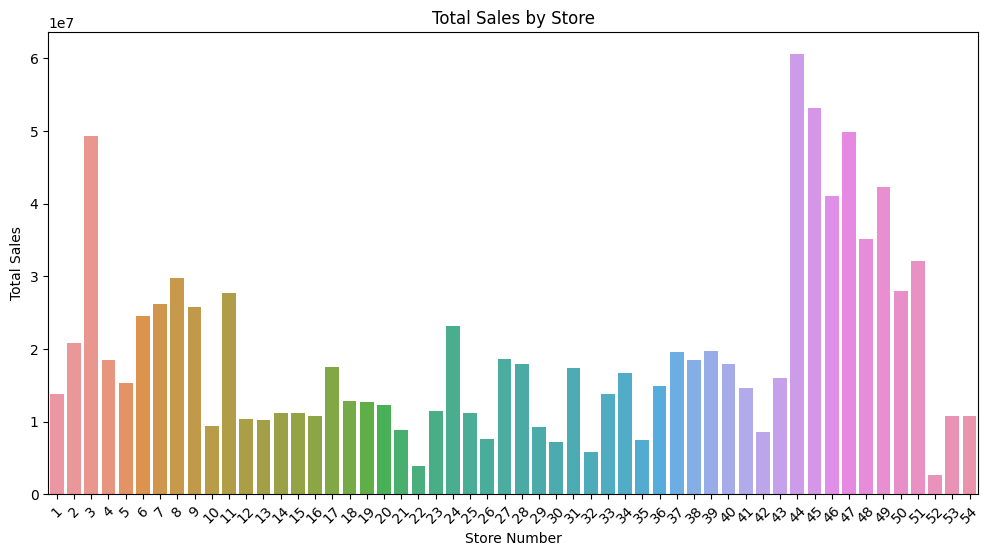

In [48]:
# Calculate the total sales for each store
store_sales = data.groupby('store_nbr')['sales'].sum().reset_index()

# Sort the stores based on sales in descending order
store_sales = store_sales.sort_values('sales', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=store_sales, x='store_nbr', y='sales')

plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.title('Total Sales by Store')

plt.xticks(rotation=45)

plt.show()

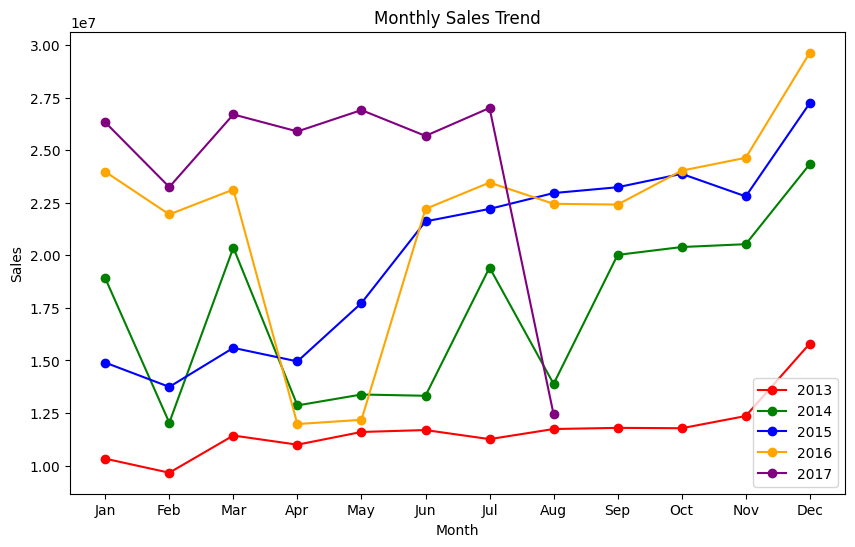

In [49]:
import itertools

# Group the data by month, year, and calculate the total sales
monthly_sales = data.groupby(['month', 'year'])['sales'].sum().reset_index()

# Create the line chart
plt.figure(figsize=(10, 6))  # Set the figure size

# Get unique years and cycle through colors
years = monthly_sales['year'].unique()
colors = itertools.cycle(['red', 'green', 'blue', 'orange', 'purple'])

for year in years:
    year_data = monthly_sales[monthly_sales['year'] == year]
    plt.plot(year_data['month'], year_data['sales'], marker='o', color=next(colors), label=str(year))

plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Trend')

# Customize x-axis ticks to show month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1, 13), month_names)


plt.legend()

plt.show()

In [50]:
data.columns

Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion', 'city', 'state',
       'type', 'cluster', 'dcoilwtico', 'transactions', 'work_day',
       'nat_batalla', 'nat_black friday', 'nat_carnaval', 'nat_cyber monday',
       'nat_dia difuntos', 'nat_dia la madre', 'nat_dia trabajo', 'nat_futbol',
       'nat_independencia', 'nat_navidad', 'nat_primer dia ano',
       'nat_primer grito', 'nat_terremoto', 'nat_viernes santo', 'day_of_week',
       'day_of_year', 'day_of_month', 'year', 'month', 'season'],
      dtype='object')

In [51]:
data.sample(5)

,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,...,nat_primer dia ano,nat_primer grito,nat_terremoto,nat_viernes santo,day_of_week,day_of_year,day_of_month,year,month,season
732404,2014-02-16,1,BEAUTY,1.00,0.0,Quito,Pichincha,4,13,101.053333,...,0.0,0.0,0.0,0.0,6,47,16,2014,2,0
2209174,2016-05-24,39,"LIQUOR,WINE,BEER",76.00,0.0,Cuenca,Azuay,2,6,48.040000,...,0.0,0.0,0.0,0.0,1,145,24,2016,5,1
379115,2013-08-01,41,FROZEN FOODS,76.97,0.0,Machala,El Oro,4,4,107.930000,...,0.0,0.0,0.0,0.0,3,213,1,2013,8,2
2002292,2016-01-29,34,HOME APPLIANCES,1.00,0.0,Guayaquil,Guayas,2,6,33.660000,...,0.0,0.0,0.0,0.0,4,29,29,2016,1,0
812075,2014-04-01,39,FROZEN FOODS,55.00,0.0,Cuenca,Azuay,2,6,99.690000,...,0.0,0.0,0.0,0.0,1,91,1,2014,4,1


In [52]:
families = ['AUTOMOTIVE','BABY CARE','BEAUTY','BEVERAGES','BOOKS','BREAD/BAKERY','CELEBRATION','CLEANING','DAIRY',
            'DELI','EGGS','FROZEN FOODS','GROCERY I','GROCERY II','HARDWARE','HOME AND KITCHEN I','HOME AND KITCHEN II',
            'HOME APPLIANCES','HOME CARE','LADIESWEAR','LAWN AND GARDEN','LINGERIE','LIQUOR,WINE,BEER','MAGAZINES',
            'MEATS','PERSONAL CARE','PET SUPPLIES','PLAYERS AND ELECTRONICS','POULTRY','PREPARED FOODS','PRODUCE',
            'SCHOOL AND OFFICE SUPPLIES','SEAFOOD']

In [53]:
FEATURES = data.columns.tolist()

no_features = ('date', 'family', 'sales', 'city','state')
for i in no_features:
    if i in FEATURES:
        FEATURES.remove(i)
    else:
        print(f"{i} not found in FEATURES list.")

TARGET = 'sales'

In [54]:
# train = data[(data['date'] >= '2013-01-01') & (data['date'] <= '2017-08-15')].reset_index(drop=True)
# test = data[(data['date'] >= '2017-08-16') & (data['date'] <= '2017-08-31')].reset_index(drop=True)

In [55]:
train = data[data['sales'].notnull()].copy()
test = data[data['sales'].isnull()].drop(['sales'],axis=1)

In [56]:
train.head(2)

,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,...,nat_primer dia ano,nat_primer grito,nat_terremoto,nat_viernes santo,day_of_week,day_of_year,day_of_month,year,month,season
0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,4,13,93.14,...,1.0,0.0,0.0,0.0,1,1,1,2013,1,0
1,2013-01-01,1,BABY CARE,0.0,0.0,Quito,Pichincha,4,13,93.14,...,1.0,0.0,0.0,0.0,1,1,1,2013,1,0


In [57]:
test.head(2)

,date,store_nbr,family,onpromotion,city,state,type,cluster,dcoilwtico,transactions,...,nat_primer dia ano,nat_primer grito,nat_terremoto,nat_viernes santo,day_of_week,day_of_year,day_of_month,year,month,season
3008016,2017-08-16,1,AUTOMOTIVE,0.0,Quito,Pichincha,4,13,46.8,NaN,...,0.0,0.0,0.0,0.0,2,228,16,2017,8,2
3008017,2017-08-16,1,BABY CARE,0.0,Quito,Pichincha,4,13,46.8,NaN,...,0.0,0.0,0.0,0.0,2,228,16,2017,8,2


In [58]:
params = {'learning_rate': 0.01,
          'n_estimators': 1000, 
          'max_depth': 15,           
          'lambda': 6, 
          'alpha': 1, 
          'colsample_bytree': 0.5, 
          'subsample': 0.7, 
          'min_child_weight': 155,
          'early_stopping_rounds': 10}

In [59]:
%%time
import numpy as np
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

cat_predictions = np.array([])
xgb_predictions = np.array([])

y_val_cat = pd.DataFrame()
y_val_xgb = pd.DataFrame()

cat = CatBoostRegressor()
xgb = XGBRegressor(**params)

test_predict = pd.DataFrame()

cat_submit = np.array([])
xgb_submit = np.array([])

# Группировка по столбцу 'family'
for family, family_data in train.groupby('family'):
    X_train_family, X_val_family, y_train_family, y_val_family = train_test_split(
        family_data, family_data[TARGET], test_size=0.05, shuffle=False)

    cat.fit(X_train_family[FEATURES], y_train_family, eval_set=[(X_train_family[FEATURES], y_train_family),
                                                               (X_val_family[FEATURES], y_val_family)],
            verbose=False, early_stopping_rounds=10)

    xgb.fit(X_train_family[FEATURES], y_train_family, eval_set=[(X_train_family[FEATURES], y_train_family),
                                                                (X_val_family[FEATURES], y_val_family)],
            verbose=False)

    cat_pred_family = cat.predict(X_val_family[FEATURES])
    cat_pred_family = np.maximum(cat_pred_family, 0)  # Заменяем отрицательные значения на 0
    cat_predictions = np.concatenate((cat_predictions, cat_pred_family))
    y_val_cat = pd.concat([y_val_cat, y_val_family])

    xgb_pred_family = xgb.predict(X_val_family[FEATURES])
    xgb_pred_family = np.maximum(xgb_pred_family, 0)  # Заменяем отрицательные значения на 0
    xgb_predictions = np.concatenate((xgb_predictions, xgb_pred_family))
    y_val_xgb = pd.concat([y_val_xgb, y_val_family])

    test_family = test.loc[test['family'] == family]

    cat_pred_submit = cat.predict(test_family[FEATURES])
    cat_pred_submit = np.maximum(cat_pred_submit, 0)  # Заменяем отрицательные значения на 0
    cat_submit = np.concatenate((cat_submit, cat_pred_submit))

    xgb_pred_submit = xgb.predict(test_family[FEATURES])
    xgb_pred_submit = np.maximum(xgb_pred_submit, 0)  # Заменяем отрицательные значения на 0
    xgb_submit = np.concatenate((xgb_submit, xgb_pred_submit))

    test_predict = pd.concat([test_predict, test_family])

    print(family, 'CatBoost RMSLE:', np.sqrt(mean_squared_log_error(y_val_family, cat_pred_family)))
    print(family, 'XGB RMSLE:', np.sqrt(mean_squared_log_error(y_val_family, xgb_pred_family)))

AUTOMOTIVE CatBoost RMSLE: 0.5197091814620173
AUTOMOTIVE XGB RMSLE: 0.5138446940188109
BABY CARE CatBoost RMSLE: 0.3054753263915449
BABY CARE XGB RMSLE: 0.29688232322719327
BEAUTY CatBoost RMSLE: 0.5242208413434751
BEAUTY XGB RMSLE: 0.5246635931229608
BEVERAGES CatBoost RMSLE: 0.22222240905986926
BEVERAGES XGB RMSLE: 0.20547336376446176
BOOKS CatBoost RMSLE: 0.12799166334165052
BOOKS XGB RMSLE: 0.12968918012113395
BREAD/BAKERY CatBoost RMSLE: 0.16948561996391423
BREAD/BAKERY XGB RMSLE: 0.16459121829446033
CELEBRATION CatBoost RMSLE: 0.619381791509518
CELEBRATION XGB RMSLE: 0.6032111853839226
CLEANING CatBoost RMSLE: 0.27481046727270586
CLEANING XGB RMSLE: 0.25950923227497585
DAIRY CatBoost RMSLE: 0.21628763285327707
DAIRY XGB RMSLE: 0.15855203242462407
DELI CatBoost RMSLE: 0.1595035050082457
DELI XGB RMSLE: 0.15829761016327115
EGGS CatBoost RMSLE: 0.34112384027556475
EGGS XGB RMSLE: 0.31671529858423253
FROZEN FOODS CatBoost RMSLE: 0.318109482436808
FROZEN FOODS XGB RMSLE: 0.31371758374

In [60]:
y_val_cat['pred'] = cat_predictions
y_val_xgb['pred'] = xgb_predictions

In [61]:
y_val_cat

,0,pred
2871264,3.000,3.882507
2871297,1.000,6.521238
2871330,10.000,7.260889
2871363,2.000,4.251157
2871396,8.000,6.662519
...,...,...
3007883,15.314,30.088501
3007916,52.876,52.339902
3007949,7.000,41.078126
3007982,5.000,7.383284


In [62]:
y_val_xgb

,0,pred
2871264,3.000,3.093313
2871297,1.000,6.112220
2871330,10.000,8.277098
2871363,2.000,3.661999
2871396,8.000,7.139271
...,...,...
3007883,15.314,26.990095
3007916,52.876,49.807995
3007949,7.000,43.594738
3007982,5.000,9.275374


In [63]:
predictions = [0.5 * a + 0.5 * b for a,b in zip(xgb_submit,cat_submit)] 

In [64]:
test_predict

,date,store_nbr,family,onpromotion,city,state,type,cluster,dcoilwtico,transactions,...,nat_primer dia ano,nat_primer grito,nat_terremoto,nat_viernes santo,day_of_week,day_of_year,day_of_month,year,month,season
3008016,2017-08-16,1,AUTOMOTIVE,0.0,Quito,Pichincha,4,13,46.80,NaN,...,0.0,0.0,0.0,0.0,2,228,16,2017,8,2
3008049,2017-08-16,2,AUTOMOTIVE,0.0,Quito,Pichincha,4,13,46.80,NaN,...,0.0,0.0,0.0,0.0,2,228,16,2017,8,2
3008082,2017-08-16,3,AUTOMOTIVE,0.0,Quito,Pichincha,4,8,46.80,NaN,...,0.0,0.0,0.0,0.0,2,228,16,2017,8,2
3008115,2017-08-16,4,AUTOMOTIVE,0.0,Quito,Pichincha,4,9,46.80,NaN,...,0.0,0.0,0.0,0.0,2,228,16,2017,8,2
3008148,2017-08-16,5,AUTOMOTIVE,0.0,Santo Domingo,Santo Domingo de los Tsachilas,4,4,46.80,NaN,...,0.0,0.0,0.0,0.0,2,228,16,2017,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3036395,2017-08-31,50,SEAFOOD,1.0,Ambato,Tungurahua,1,14,47.26,NaN,...,0.0,0.0,0.0,0.0,3,243,31,2017,8,2
3036428,2017-08-31,51,SEAFOOD,1.0,Guayaquil,Guayas,1,17,47.26,NaN,...,0.0,0.0,0.0,0.0,3,243,31,2017,8,2
3036461,2017-08-31,52,SEAFOOD,1.0,Manta,Manabi,1,11,47.26,NaN,...,0.0,0.0,0.0,0.0,3,243,31,2017,8,2
3036494,2017-08-31,53,SEAFOOD,0.0,Manta,Manabi,4,13,47.26,NaN,...,0.0,0.0,0.0,0.0,3,243,31,2017,8,2


In [65]:
df_sample = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv", index_col='id')

In [66]:
test_predict.index = df_sample.index

In [67]:
test_predict['pred'] = predictions

In [68]:
df_sample['sales'] = test_predict['pred']

In [69]:
df_sample

,sales
id,
3000888,7.292232
3000889,8.156153
3000890,9.354005
3000891,7.151050
3000892,7.979607
...,...
3029395,35.351087
3029396,53.601533
3029397,43.256952


In [70]:
df_sample.to_csv('submission.csv')